In [6]:
 import numpy as np
import sympy as sp
import scipy.optimize as sciopt

import jax
import copy
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp

import autoscattering.symbolic as sym
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import autoscattering.constraints as msc
import autoscattering.architecture_optimizer as arch_opt
from tqdm import trange

np.set_printoptions(linewidth=200)

In [20]:
# Do not allow any coupling between the (optical) port modes
enforced_constraints = [msc.Constraint_coupling_zero(0,1), msc.Constraint_coupling_zero(0,2), msc.Constraint_coupling_zero(1,2)]

# Define target scattering behavior
phases = sp.symbols('varphi_1 varphi_2 varphi_3', real=True)
S_target = sp.Matrix([[0,sp.exp(sp.I*phases[0]),0],[0,0,sp.exp(sp.I*phases[1])],[sp.exp(sp.I*phases[2]),0,0]])
sym.render(S_target)

# All couplings to the zero-loss modes are rescaled by the respective detuning (see paper).
# However, the sign of the detuning is still free to be chosen. You have to loop over all possible signs using the signs_zero_loss_detunings parameter.
# It is a list whose elements include the sign of all zero-loss modes. For two zero-loss modes, you have to test the combinations [1,1] and [1,-1]. All other are covered by symmetry.

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=2, # two zero-loss modes
    signs_zero_loss_detunings=[1, -1], 
    enforced_constraints=enforced_constraints,
    free_gauge_phases=False # we already added all possible phase degrees of freedom in the definition of S_target
)

<IPython.core.display.Math object>

fully connected graph is a valid graph


In [21]:
irreducible_graphs = optimizer.perform_depth_first_search()

prepare list of all possible graphs


5832it [00:00, 232666.70it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 19.03it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:01<00:00, 25.12it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 132/132 [00:05<00:00, 26.12it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 309/309 [00:20<00:00, 15.06it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 426/426 [00:17<00:00, 24.72it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 414/414 [00:18<00:00, 22.40it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 225/225 [00:09<00:00, 24.18it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 54/54 [00:02<00:00, 23.09it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


optimisation finished, list of irreducible graphs has 54 elements


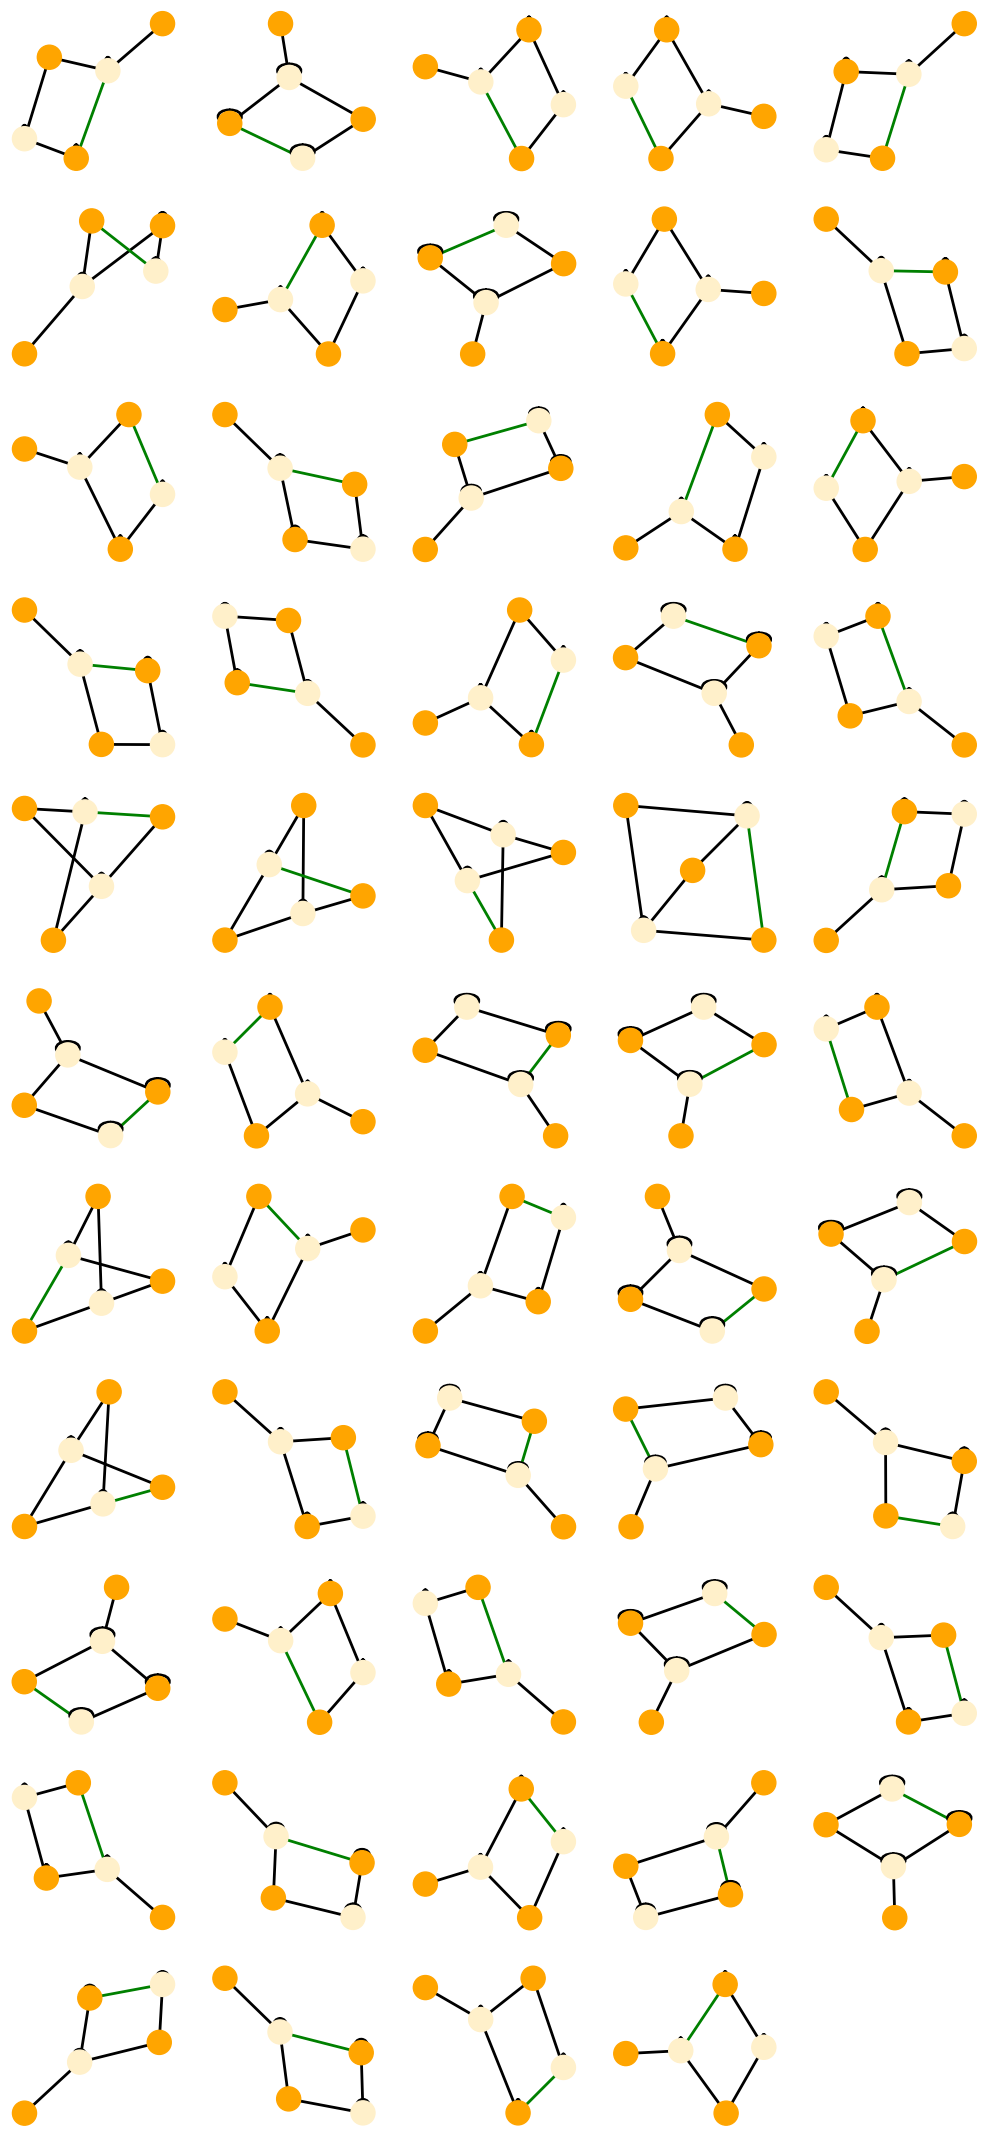

In [22]:
# Plot all identified graphs, all of them are identical (up to symmetry or gauge transformations) with the two graphs shown in Fig. 4b: Irreducible graphs
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [24]:
# For completeness: Try out the other sign combination for the detunings
optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=2, # two zero-loss modes
    signs_zero_loss_detunings=[1, 1], 
    enforced_constraints=enforced_constraints,
    free_gauge_phases=False # we already added all possible phase degrees of freedom in the definition of S_target
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


5832it [00:00, 487420.16it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 19.22it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 23.35it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:04<00:00,  8.66it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 113/113 [00:04<00:00, 25.21it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 240/240 [00:14<00:00, 16.80it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 291/291 [00:14<00:00, 20.12it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 229/229 [00:12<00:00, 18.65it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 72/72 [00:03<00:00, 20.72it/s]


test all graphs with 9 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 72 elements


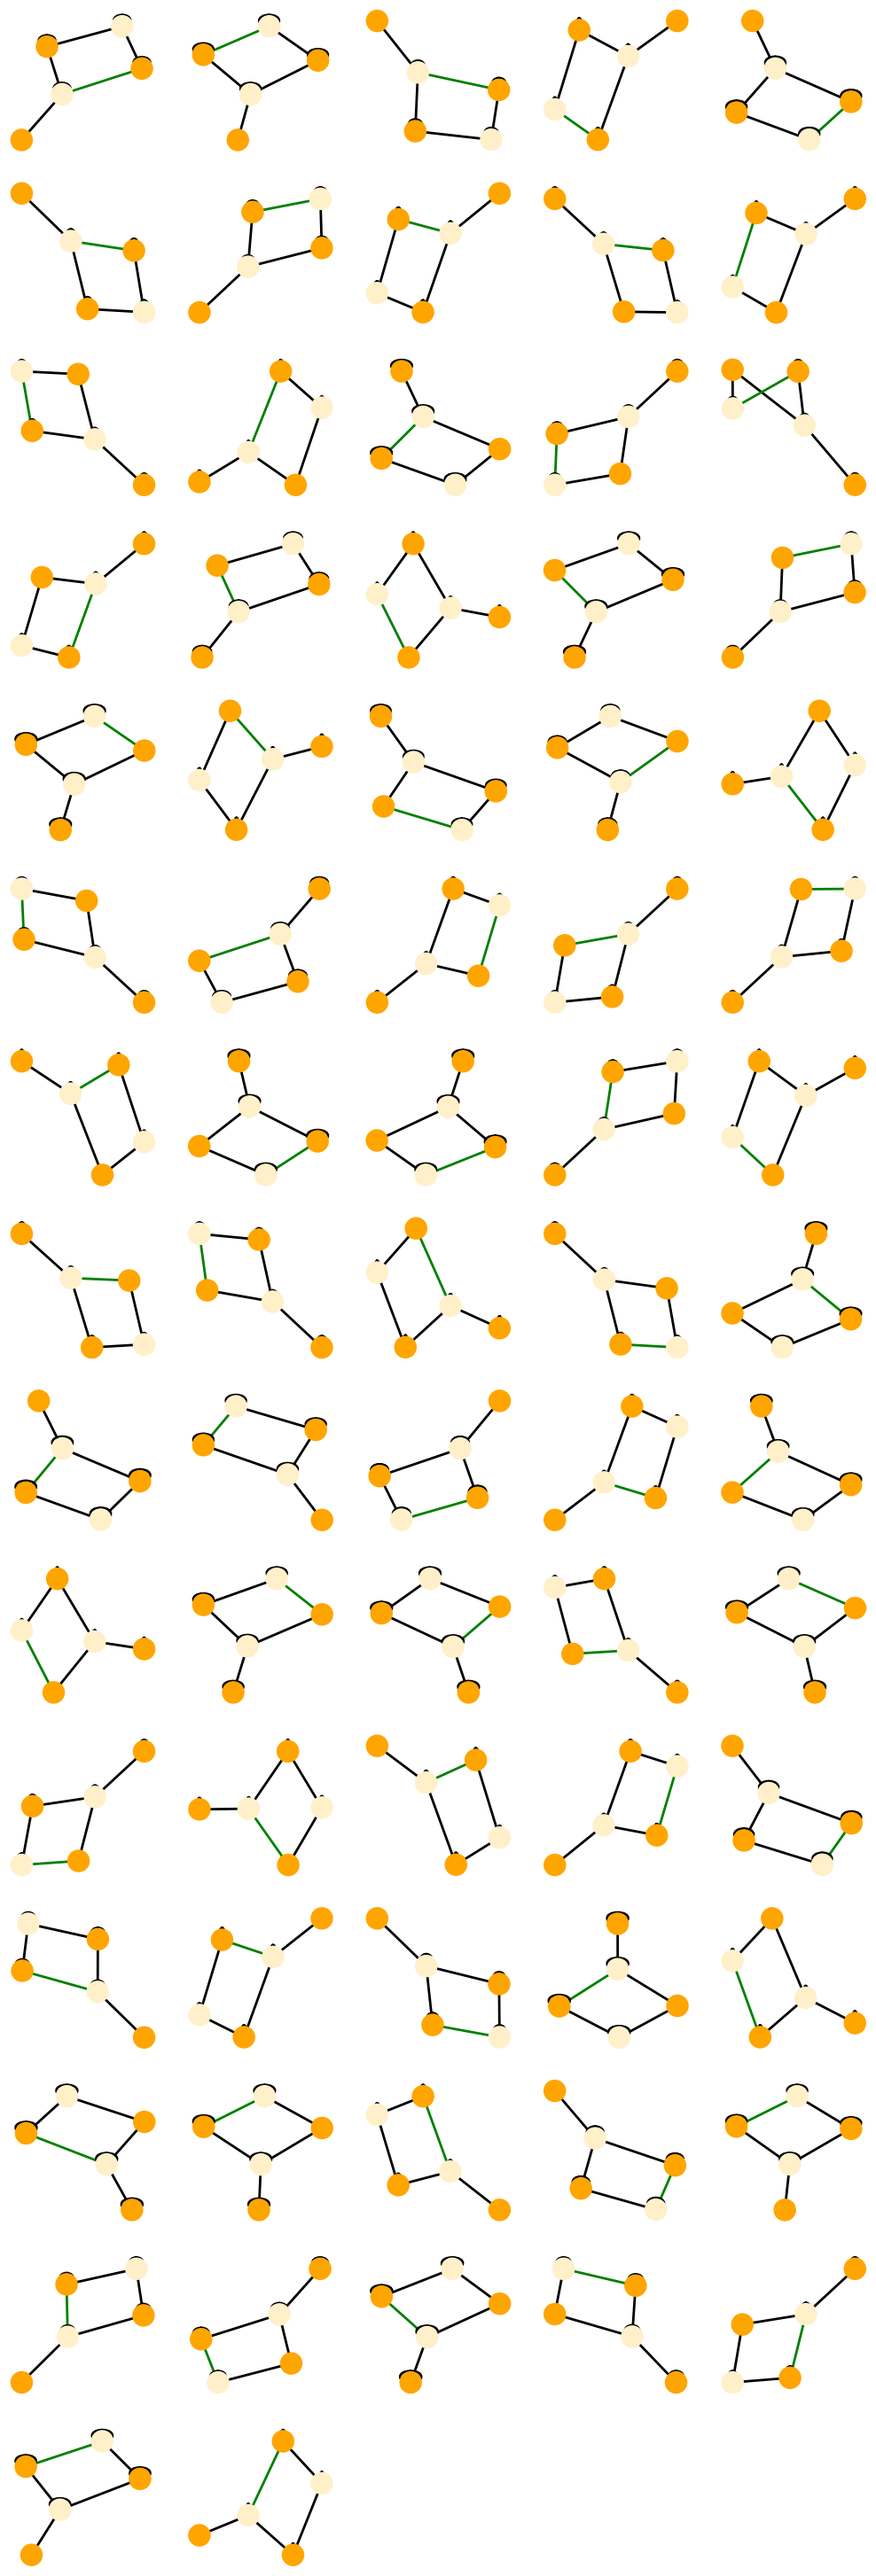

In [25]:
# Plot all identified graphs, all graphs equal the rightmost graph in Fig.3(b), besides having one detuning more.
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [33]:
# We now loosen the contraints on the couplings between the port modes. Couplings between them are now allowed.
# However they have be real valued to make sure that all couplings between the port modes can be implemented passively.
enforced_constraints = [msc.Constraint_coupling_phase_zero(0,1), msc.Constraint_coupling_phase_zero(0,2), msc.Constraint_coupling_phase_zero(1,2)]

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=1, 
    signs_zero_loss_detunings=[1], #only the relative sign between zero-loss modes is relevant, so the sign here does not matter
    enforced_constraints=enforced_constraints,
    free_gauge_phases=False # we already added all possible phase degrees of freedom in the definition of S_target
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


1728it [00:00, 365863.57it/s]


1728 graphs identified
start depth-first search
test all graphs with 16 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 20.59it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 25.70it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 21/21 [00:00<00:00, 30.70it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 53/53 [00:02<00:00, 23.33it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 99/99 [00:14<00:00,  7.07it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 85/85 [00:03<00:00, 21.80it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 63/63 [00:02<00:00, 27.09it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 8/8 [00:00<00:00, 35.25it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 45 elements


100%|██████████| 45/45 [00:00<00:00, 12125.38it/s]


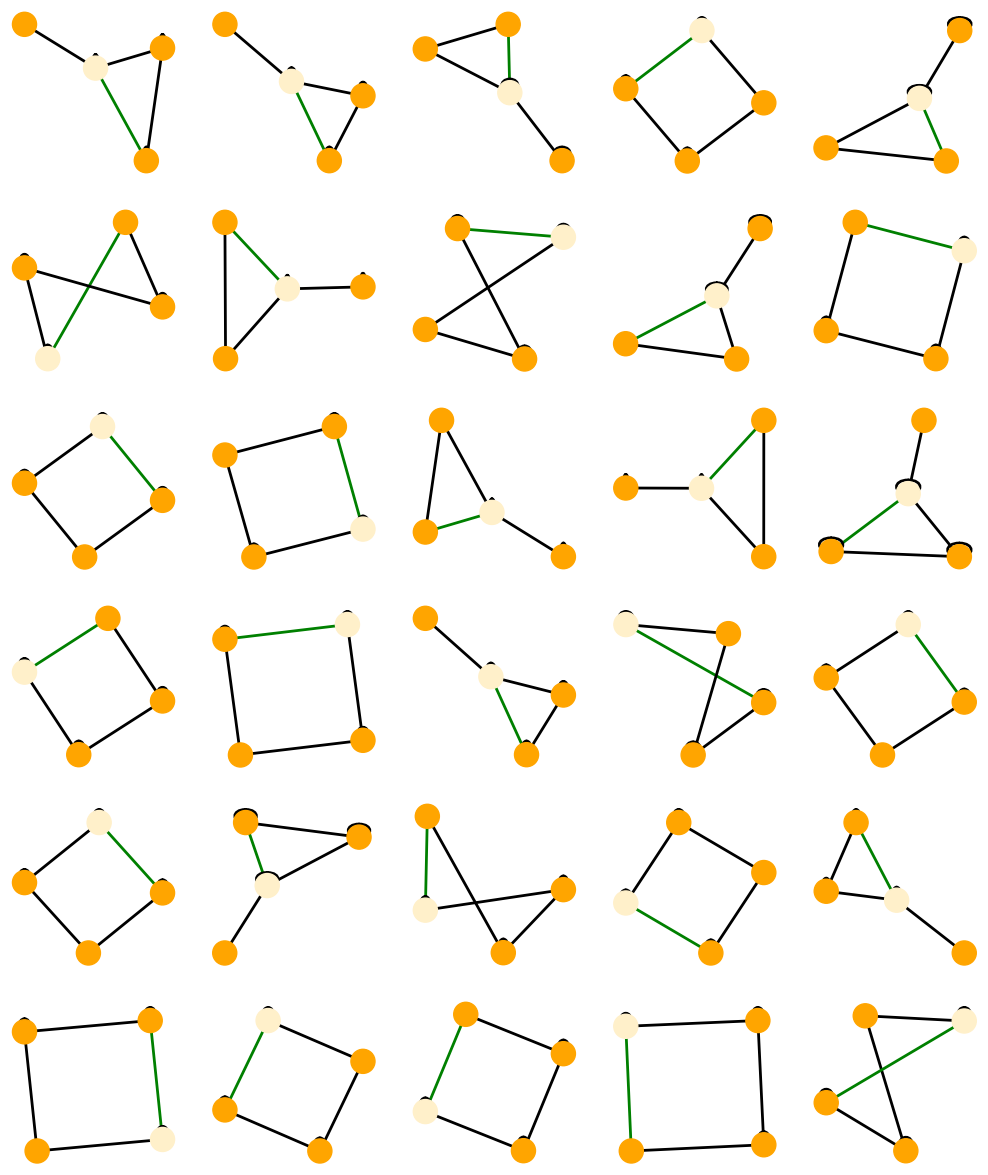

In [32]:
# Plot all identified graphs which have the smallest number of couplings
from autoscattering.architecture import characterize_architectures
irreducible_graphs_info = characterize_architectures(irreducible_graphs)
num_min_couplings = np.min(irreducible_graphs_info['num_couplings'])
idxs = np.where(irreducible_graphs_info['num_couplings'] == num_min_couplings)[0]
irreducible_graphs_min_couplings = irreducible_graphs[idxs]

node_colors = ['orange', 'orange', 'orange', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs_min_couplings, node_colors=node_colors)